# `Project`

The `Project` class lets us handle groups of wells. It is really just a list of `Well` objects.

In [1]:
from welly import Project

In [2]:
!ls *.LAS

P-129_out.LAS  P-130_out.LAS


In [3]:
p = Project.from_las("P-*.LAS")

2it [00:07,  3.70s/it]


In [4]:
len(p)

2

In [5]:
p

Index,UWI,Data,Curves
0,100/N14A/11E05,18 curves,"CALI, DT, NPHI_SAN, NPHI_LIM, NPHI_DOL, DPHI_LIM, DPHI_SAN, DPHI_DOL, M2R9, M2R6, M2R3, M2R2, M2R1, GR, SP, PEF, DRHO, RHOB"
1,Long = 63* 45'24.460 W,24 curves,"CALI, HCAL, PEF, DT, DTS, DPHI_SAN, DPHI_LIM, DPHI_DOL, NPHI_SAN, NPHI_LIM, NPHI_DOL, RLA5, RLA3, RLA4, RLA1, RLA2, RXOZ, RXO_HRLT, RT_HRLT, RM_HRLT, DRHO, RHOB, GR, SP"


Typical, the UWIs are a disaster. Let's ignore this for now.

The `Project` is really just a list-like thing:

In [6]:
for w in p:
    print(w.uwi)

100/N14A/11E05
Long = 63* 45'24.460  W


## Plot curves from several wells

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

In [8]:
alias = {'GR': ['GR', 'GRC', 'NGT']}

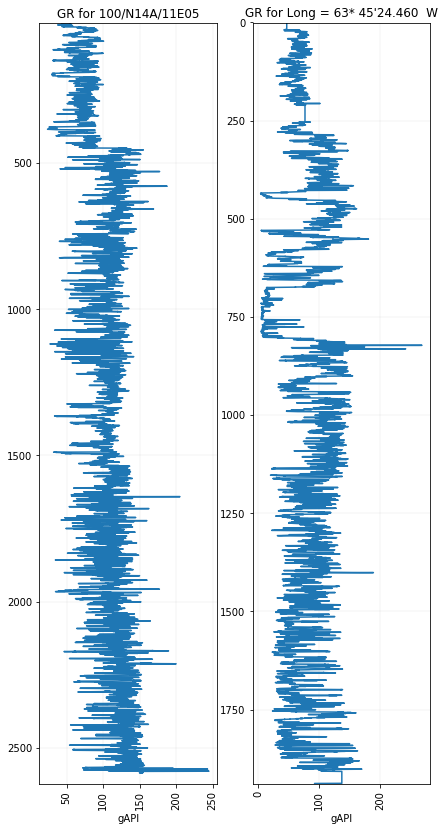

In [9]:
fig, axs = plt.subplots(figsize=(7, 14), ncols=2)

for i, w in enumerate(p):
    ax = axs[i]
    gr = w.get_curve('GR', alias=alias)
    ax = gr.plot(ax=ax)
    ax.set_title("GR for {}".format(w.uwi))
    
plt.show()

## Export data to pandas DataFrame

This makes a DataFrame using a dual index of UWI and Depth.

In [10]:
df = p.df()

/home/matt/anaconda3/envs/welly/lib/python3.7/site-packages/welly/project.py:421: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([w.df(uwi=True) for w in self])


In [11]:
df.head()

CALI  DPHI_DOL  DPHI_LIM  DPHI_SAN  DRHO  DT  DTS  GR  \
UWI            Depth                                                          
100/N14A/11E05 20.1    NaN       NaN       NaN       NaN   NaN NaN  NaN NaN   
               20.2    NaN       NaN       NaN       NaN   NaN NaN  NaN NaN   
               20.3    NaN       NaN       NaN       NaN   NaN NaN  NaN NaN   
               20.4    NaN       NaN       NaN       NaN   NaN NaN  NaN NaN   
               20.5    NaN       NaN       NaN       NaN   NaN NaN  NaN NaN   

                      HCAL  M2R1 ...  RLA1  RLA2  RLA3  RLA4  RLA5  RM_HRLT  \
UWI            Depth             ...                                          
100/N14A/11E05 20.1    NaN   NaN ...   NaN   NaN   NaN   NaN   NaN      NaN   
               20.2    NaN   NaN ...   NaN   NaN   NaN   NaN   NaN      NaN   
               20.3    NaN   NaN ...   NaN   NaN   NaN   NaN   NaN      NaN   
               20.4    NaN   NaN ...   NaN   NaN   NaN   NaN   NaN      NaN   
               20.5    NaN   NaN ...   NaN   NaN   NaN   NaN   NaN      NaN   

                      RT_HRLT  RXOZ  RXO_HRLT  SP  
UWI            Depth                               
100/N14A/11E05 20.1       NaN   NaN       NaN NaN  
               20.2       NaN   NaN       NaN NaN  
               20.3       NaN   NaN       NaN NaN  
               20.4       NaN   NaN       NaN NaN  
               20.5       NaN   NaN       NaN NaN  

[5 rows x 29 columns]

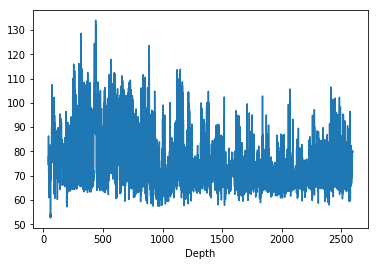

In [12]:
df.loc['100/N14A/11E05'].DT.plot()

In [13]:
x = df.loc['100/N14A/11E05'].index
idx = df.loc['100/N14A/11E05'].loc[(28<x) & (x<30)].index
idx

Float64Index([28.099999999999547,  28.19999999999954, 28.299999999999535,
               28.39999999999953, 28.499999999999524,  28.59999999999952,
              28.699999999999513, 28.799999999999507,   28.8999999999995,
              28.999999999999496,  29.09999999999949, 29.199999999999484,
               29.29999999999948, 29.399999999999473, 29.499999999999467,
               29.59999999999946, 29.699999999999456,  29.79999999999945,
              29.899999999999444,  29.99999999999944],
             dtype='float64', name='Depth')

## Quality

We can make some tests of curve quality.

In [14]:
import welly.quality as q

In [41]:
tests = {
#    'Each': [q.no_gaps],
    'GR': [q.no_monotonic, q.no_flat, q.all_positive],
    'DT': [q.all_positive, q.all_between(50, 200)],
}

In [15]:
from IPython.display import HTML

In [42]:
HTML(p.curve_table_html(keys=['CALI', 'GR', 'DT', 'SP'], tests=tests))